In [28]:
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
stock1 = "AMZN"
stock2 = "DPZ"
spread = pd.read_csv(f"./data/spread/spread_{stock1}_{stock2}.csv", index_col=0)
spread.index = pd.to_datetime(spread.index)
ARIMA_val = pd.read_csv(f"./ARIMA/validation_result/ARIMA_{stock1}_{stock2}.csv", index_col=0)
LSTM_val = pd.read_csv(f"./LSTM_spread_forecasting/validation_result/LSTM_{stock1}_{stock2}.csv", index_col=0)
CNN_LSTM_val = pd.read_csv(f"./LSTM_spread_forecasting/validation_result/CNN_LSTM_{stock1}_{stock2}.csv", index_col=0)
print(len(spread), len(ARIMA_val), len(LSTM_val), len(CNN_LSTM_val))

2109 211 202 199


In [30]:
length = len(CNN_LSTM_val)
spread = spread.iloc[-length:]
ARIMA_val = ARIMA_val.iloc[-length:]
LSTM_val = LSTM_val.iloc[-length:]

ARIMA_val.index = spread.index
LSTM_val.index = spread.index
CNN_LSTM_val.index = spread.index
CNN_LSTM_val.head()

,0
Date,
2023-08-07,0.379999
2023-08-08,0.217510
2023-08-09,0.309298
2023-08-10,0.427415
2023-08-11,0.473826


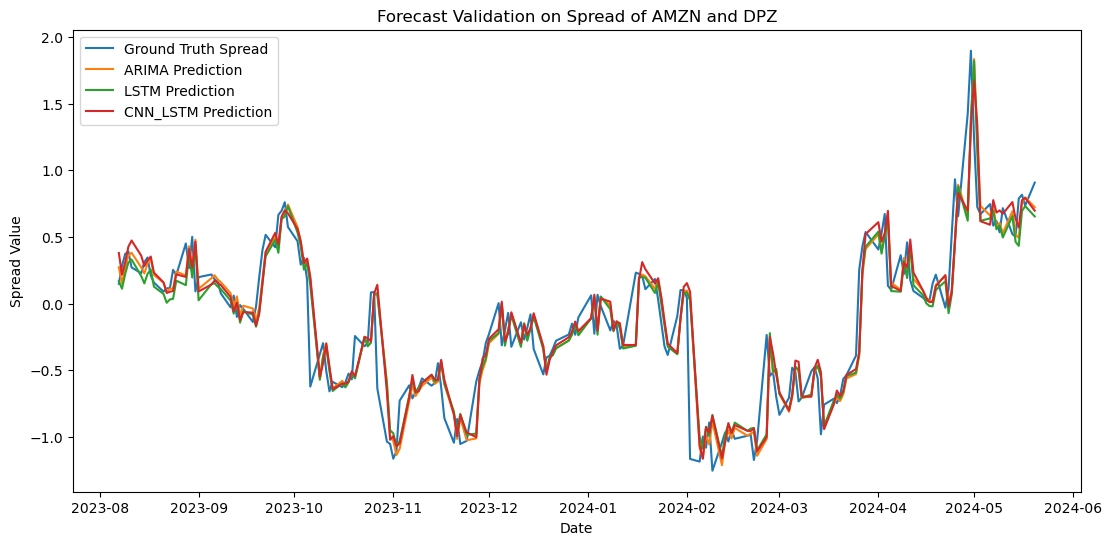

In [31]:
plt.figure(figsize=(13, 6))
plt.plot(spread, label="Ground Truth Spread")
plt.plot(ARIMA_val, label="ARIMA Prediction")
plt.plot(LSTM_val, label="LSTM Prediction")
plt.plot(CNN_LSTM_val, label="CNN_LSTM Prediction")
plt.title(f"Forecast Validation on Spread of {stock1} and {stock2}")
plt.xlabel("Date")
plt.ylabel("Spread Value")
plt.legend()
plt.show()